# Machine Learning Housing Corporation Project

- **Goal**: Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.
- There are eight main steps:
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## 1. Frame the problem
- is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use *batch learning* or *online learning* techniques?
- Answer:
    - **Supervised learning** task since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price).
    - **Multiple regression** problem since the system will use multiple features to make a prediction
    - **Univariate regression** problem since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a *multivariate* regression problem
    - **Batch learning** as no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly

### 1.1. Select a Performance Measure
- **Root Mean Square Error (RMSE)**: Typical performance measure for regression problems.
    - `m` is the number of instances in the dataset you are measuring the RMSE on.For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
    ![](image.png)
   
- **Mean Absolute Error** (also called the Average Absolute Deviation):
![](image_2.png)


### 1.2. Check the Assumptions
Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on.

## 2. Get the data
### 2.1. Read the data & initial exploration

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

In [3]:
df_housing = pd.read_csv("housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640 record trong dataset cho các feature ngoại trừ total_bedrooms chỉ có 20433 records.
- Tất cả các feature đều có type là float64 trừ ocean_proximity có type là object.

In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Ví dụ:** <br>
`25%` các quận có housing_median_age thấp hơn `18`, trong khi `50%` thấp hơn `29` và `75%` thấp hơn `37`. Chúng thường được gọi là phần trăm thứ `25` (hoặc tứ phân vị thứ 1), trung vị và phần trăm thứ `75` (hoặc tứ phân vị thứ 3).

In [7]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

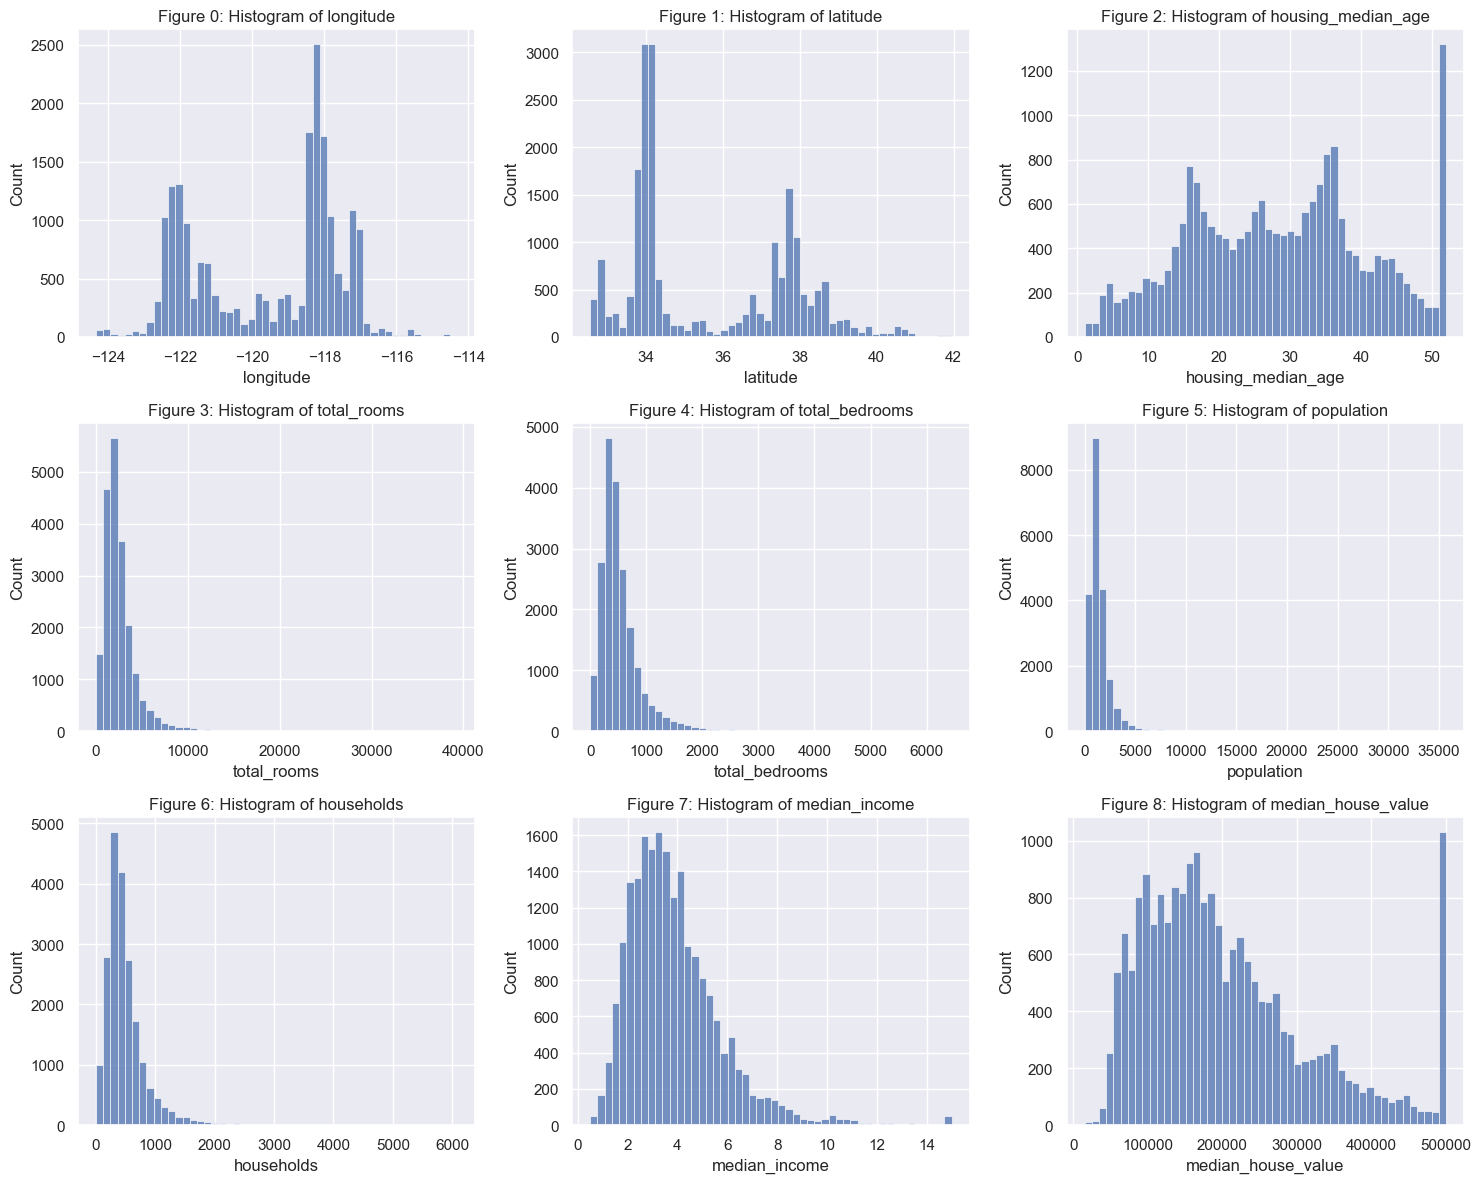

In [58]:
# df_housing.hist(bins=50, figsize=(20, 15))
# plt.show()

numeric_cols = df_housing.select_dtypes(include=[np.number]).columns.to_list() # Lấy ra những feature nào thuộc numerical feature

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through list "numeric_cols"
        if i < len(numeric_cols):
            ax_i = ax[r, c]
            sns.histplot(data=df_housing[numeric_cols[i]], bins = 50, ax=ax_i);
            ax_i.set_title(f"Figure {i}: Histogram of {numeric_cols[i]}")
        else:
            pass

plt.tight_layout()
plt.show()

In [31]:
# Đếm số lượng dòng có median_house_value đúng bằng 500000
num_capped = (df_housing["median_house_value"] == 500001.0).sum()
print(f"Số lượng dòng bị capped ở 500001.0: {num_capped}")

# Kiểm tra giá trị lớn nhất của median_house_value
max_value = df_housing["median_house_value"].max()
print(f"Giá trị lớn nhất của median_house_value: {max_value}")

# Đếm số lượng dòng có housing_median_age đúng bằng 500000
num_capped = (df_housing["housing_median_age"] == 52).sum()
print(f"Số lượng dòng bị capped ở 52: {num_capped}")

# Kiểm tra giá trị lớn nhất của housing_median_age
max_value = df_housing["housing_median_age"].max()
print(f"Giá trị lớn nhất của housing_median_age: {max_value}")

Số lượng dòng bị capped ở 500001.0: 965
Giá trị lớn nhất của median_house_value: 500001.0
Số lượng dòng bị capped ở 52: 1273
Giá trị lớn nhất của housing_median_age: 52.0


1. Đầu tiên, feature `median_income` có giá trị cao nhất là mức 15 (thực tế là 150001) đối với thu nhập cao hơn mức thu nhập trung bình  và ở mức 0,5 (thực tế là 0,4999) đối với thu nhập thấp hơn mức thu nhập trung bình. Các con số này biểu thị khoảng hàng chục nghìn đô la (ví dụ: `3` thực sự có nghĩa là khoảng `$30.000`). 

2. Hai thuộc tính `housing_median_age` và `median_house_value` đã bị capped (giới hạn trên). Đặc biệt, `median_house_value` bị giới hạn tối đa ở mức `$500,000`. Điều này có thể gây ra vấn đề nghiêm trọng vì: <br>
- Đây là biến mục tiêu (label) mà bạn cần dự đoán.
- Nếu mô hình học máy chỉ nhìn thấy giá trị tối đa là $500,000, nó sẽ không học được về các trường hợp giá nhà thực tế cao hơn mức này.
- Khi gặp dữ liệu mới có giá trị thực tế vượt $500,000, mô hình sẽ không thể dự đoán chính xác (thường chỉ dự đoán tối đa là `$500000`).

**Tại sao đây là vấn đề?** <br>
- Mô hình sẽ bị lệch (bias) và không phản ánh đúng thực tế thị trường nếu có nhiều nhà giá cao hơn mức cap.
- Nếu khách hàng (người sử dụng mô hình) cần dự đoán chính xác cho các trường hợp giá cao, mô hình sẽ không đáp ứng được.

**Giải pháp:** <br>
**Thu thập lại nhãn đúng (Collect proper labels):**
- Tìm và cập nhật lại giá trị thực tế cho các quận bị giới hạn ở `$500000`.
- Điều này giúp mô hình học được toàn bộ phân phối giá trị, kể cả các giá trị lớn hơn `$500000`.

**Loại bỏ các dòng bị capped (Remove capped districts):**
- Xóa các dòng có median_house_value == `$500000` khỏi tập huấn luyện và tập kiểm tra.
- Như vậy, mô hình chỉ học và dự đoán trong phạm vi giá trị mà nó thực sự biết, tránh bị đánh giá sai khi gặp các trường hợp vượt quá giới hạn.

### 2.1. Create a Test Set
- Giả sử bạn trò chuyện với các chuyên gia, họ nói với bạn rằng `median_income` là một thuộc tính rất quan trọng để dự đoán giá `median housing`.
- Bạn có thể muốn đảm bảo rằng tập kiểm tra đại diện cho các loại thu nhập khác nhau trong toàn bộ tập dữ liệu. Vì `median income` là một thuộc tính số liên tục, trước tiên bạn cần tạo một thuộc tính loại thu nhập (`income category attribute`).

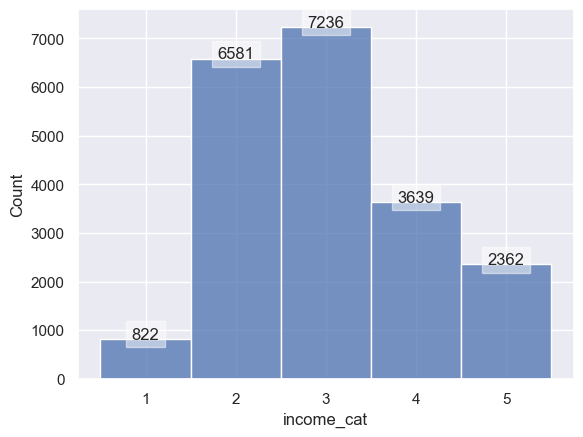

In [66]:
# pd.cut(...): Hàm này chia một cột số liên tục thành các khoảng (bins) rời rạc.
# housing["median_income"]: Cột thu nhập trung vị của từng khu vực.
# bins=[0., 1.5, 3.0, 4.5, 6., np.inf]:
# Chia giá trị thành 5 khoảng:
# (0, 1.5] → nhóm 1
# (1.5, 3.0] → nhóm 2
# (3.0, 4.5] → nhóm 3
# (4.5, 6.0] → nhóm 4
# (6.0, ∞) → nhóm 5
# labels=[1, 2, 3, 4, 5]: Gán nhãn cho từng nhóm tương ứng.
df_housing["income_cat"] = pd.cut(df_housing["median_income"],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1, 2, 3, 4, 5])

sns.histplot(data=df_housing["income_cat"]);
for index, value in enumerate(df_housing["income_cat"].value_counts().sort_index().to_list()):
    plt.text(index + 1, value, str(value), ha='center', bbox = dict(facecolor = "white", alpha = 0.5))

- Bây giờ bạn đã sẵn sàng thực hiện lấy mẫu phân tầng dựa trên `income_cat`. Đối với việc này, bạn có thể sử dụng lớp `StratifiedShuffleSplit` của Scikit-Learn.

Giải thích chi tiết về StratifiedShuffleSplit
StratifiedShuffleSplit là một công cụ trong thư viện Scikit-Learn dùng **để chia tập dữ liệu thành các tập con (train/test) theo cách phân tầng (stratified)**, đồng thời **xáo trộn (shuffle)** các mẫu trước khi chia.

**1. Stratified là gì?** <br>
Stratified nghĩa là việc chia dữ liệu sẽ đảm bảo tỷ lệ (phân phối) của một thuộc tính nào đó (thường là nhãn hoặc một đặc trưng quan trọng) giống nhau ở cả tập train và test. <br>
Ví dụ: Nếu bạn có 5 nhóm thu nhập (income_cat), thì tỷ lệ các nhóm này trong tập train và test sẽ gần giống với tỷ lệ của toàn bộ dữ liệu. <br>

**2. Tại sao cần Stratified?** <br>
Nếu chia ngẫu nhiên, có thể một số nhóm quan trọng bị thiếu hoặc quá ít trong tập test/train, dẫn đến mô hình học không đúng hoặc đánh giá sai. <br>
Đặc biệt quan trọng khi dữ liệu mất cân bằng (một số nhóm rất ít). <br>

**3. Cách hoạt động của StratifiedShuffleSplit** <br>
Bạn chỉ định số lần chia (n_splits), tỷ lệ test (test_size), và cột dùng để phân tầng (ví dụ: income_cat). <br>
Mỗi lần chia, dữ liệu được xáo trộn và sau đó chia theo tỷ lệ của từng nhóm trong cột phân tầng. <br>
Kết quả: **Tập train và test đều có phân phối nhóm giống nhau với toàn bộ dữ liệu.**

**4. Ví dụ** <br>
```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
```
Ở đây, dữ liệu được chia thành 80% train, 20% test, giữ nguyên tỷ lệ các nhóm income_cat ở cả hai tập.

**5. Lợi ích:** <br>
Đảm bảo tập train và test đại diện tốt cho toàn bộ dữ liệu.
Đánh giá mô hình chính xác hơn, tránh bias do chia ngẫu nhiên.

**Tóm lại:** <br>
StratifiedShuffleSplit giúp bạn chia dữ liệu thành train/test mà vẫn giữ nguyên tỷ lệ phân phối của một thuộc tính quan trọng, đảm bảo mô hình học và đánh giá khách quan, đặc biệt hữu ích khi dữ liệu có các nhóm không cân bằng.

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]
    

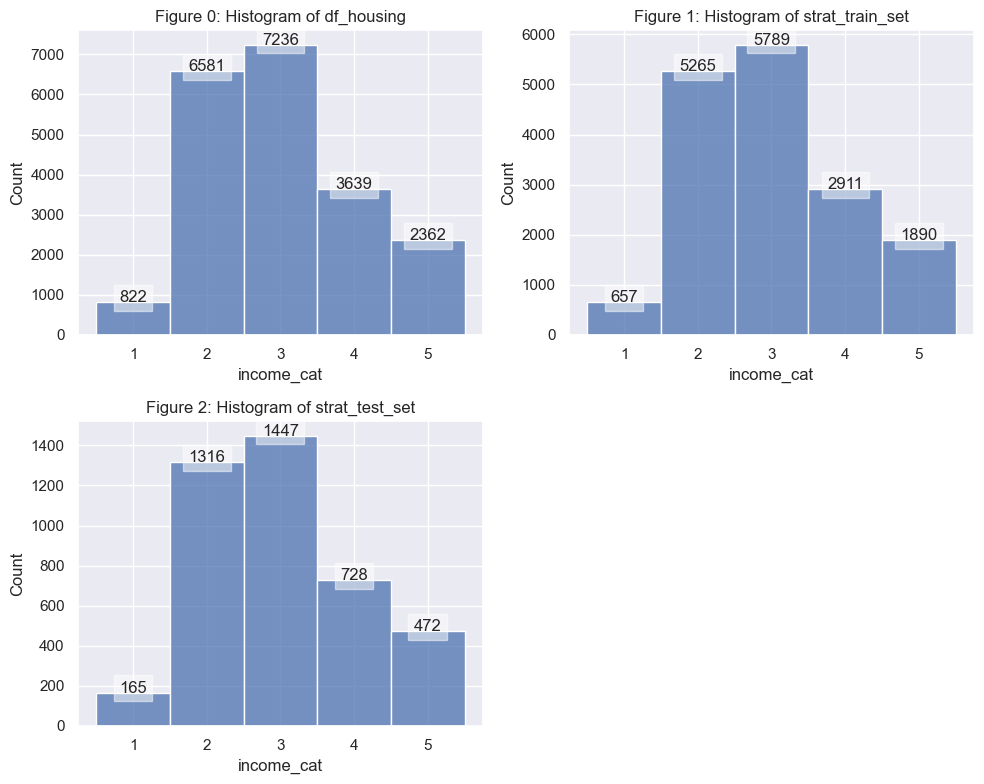

In [82]:
def add_label_income_cat(df, ax_i):
    for index, value in enumerate(df["income_cat"].value_counts().sort_index().to_list()):
        ax_i.text(index + 1, value, str(value), ha='center', bbox = dict(facecolor = "white", alpha = 0.5))

list_label_income = ["df_housing", "strat_train_set", "strat_test_set"]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through list "numeric_cols"
        if i < len(list_label_income):
            ax_i = ax[r, c]
            if r == 0 and c == 0:
                sns.histplot(data=df_housing["income_cat"], ax=ax_i);
                add_label_income_cat(df_housing, ax_i)
            else:
                if r == 0 and c == 1:
                    sns.histplot(data=strat_train_set["income_cat"], ax=ax_i);
                    add_label_income_cat(strat_train_set, ax_i)
                else:
                    sns.histplot(data=strat_test_set["income_cat"], ax=ax_i);
                    add_label_income_cat(strat_test_set, ax_i)
            ax_i.set_title(f"Figure {i}: Histogram of {list_label_income[i]}")
        else:
            pass
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# So sánh với lấy mẫu ngẫu nhiên
# Break off validation set from training data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

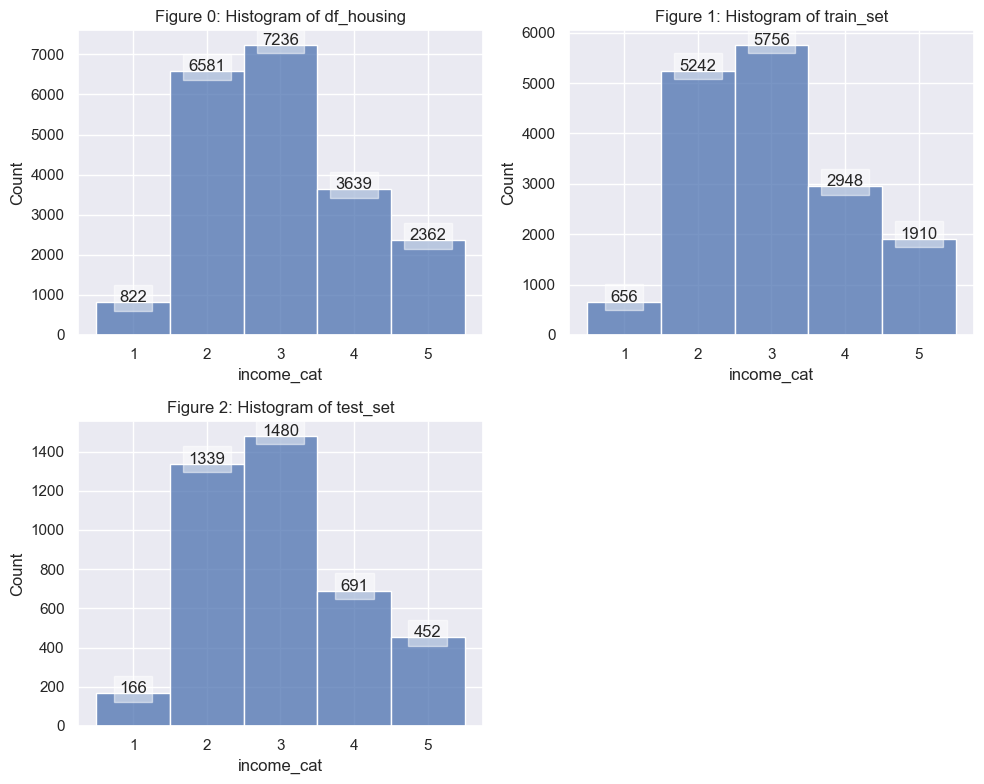

In [85]:
list_label_income2 = ["df_housing", "train_set", "test_set"]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through list "numeric_cols"
        if i < len(list_label_income2):
            ax_i = ax[r, c]
            if r == 0 and c == 0:
                sns.histplot(data=df_housing["income_cat"], ax=ax_i);
                add_label_income_cat(df_housing, ax_i)
            else:
                if r == 0 and c == 1:
                    sns.histplot(data=train_set["income_cat"], ax=ax_i);
                    add_label_income_cat(train_set, ax_i)
                else:
                    sns.histplot(data=test_set["income_cat"], ax=ax_i);
                    add_label_income_cat(test_set, ax_i)
            ax_i.set_title(f"Figure {i}: Histogram of {list_label_income2[i]}")
        else:
            pass
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

🔴 Như bạn có thể thấy, tập kiểm tra được tạo ra bằng cách sử dụng phương pháp lấy mẫu phân tầng (`stratified sampling`) có tỷ lệ nhóm thu nhập gần giống hệt với những tỷ lệ trong tập dữ liệu đầy đủ, **tuy nhiên  khi tập kiểm tra được tạo ra bằng cách sử dụng phương pháp lấy mẫu hoàn toàn ngẫu nhiên thì lại không lệch nhiều**.

Dù trong trường hợp này tỷ lệ các nhóm thu nhập giữa lấy mẫu phân tầng (stratified sampling) và lấy mẫu ngẫu nhiên (random sampling) không bị lệch quá nhiều, bạn vẫn nên ưu tiên dùng lấy mẫu phân tầng.

**Lý do:**

Lấy mẫu phân tầng đảm bảo chắc chắn rằng tỷ lệ các nhóm quan trọng (ví dụ: nhóm thu nhập thấp, cao) trong tập train và test giống với toàn bộ dữ liệu.
Nếu dữ liệu thực tế có sự mất cân bằng (một số nhóm rất ít), lấy mẫu ngẫu nhiên có thể vô tình làm thiếu hoặc thừa một nhóm nào đó trong tập test/train, dẫn đến mô hình học sai lệch hoặc đánh giá không khách quan. <br>
Lấy mẫu phân tầng là thói quen tốt và là chuẩn mực trong các dự án thực tế, giúp bạn tránh rủi ro khi dữ liệu thay đổi hoặc khi áp dụng cho các tập dữ liệu lớn hơn, phức tạp hơn. <br>

**Tóm lại:** <br>
Nên dùng lấy mẫu phân tầng để đảm bảo tính đại diện và khách quan cho tập train/test, dù trong trường hợp này sự khác biệt không lớn. Đây là phương pháp an toàn và chuyên nghiệp hơn.

In [86]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Bây giờ bạn đã xóa thuộc tính `income_cat` để dữ liệu trở lại trạng thái ban đầu.

## 3. Explore the data to gain insights.
- Trước tiên, hãy đảm bảo rằng bạn đã đặt bộ kiểm tra sang một bên và bạn chỉ đang khám phá bộ đào tạo
- nếu bộ đào tạo rất lớn, bạn có thể muốn lấy mẫu một bộ khám phá để thao tác dễ dàng và nhanh chóng

### 3.1. Visualizing Geographical Data
- Hãy tạo một bản sao để bạn có thể chơi mà không làm hỏng bộ huấn luyện

In [87]:
df_housing = strat_train_set.copy()

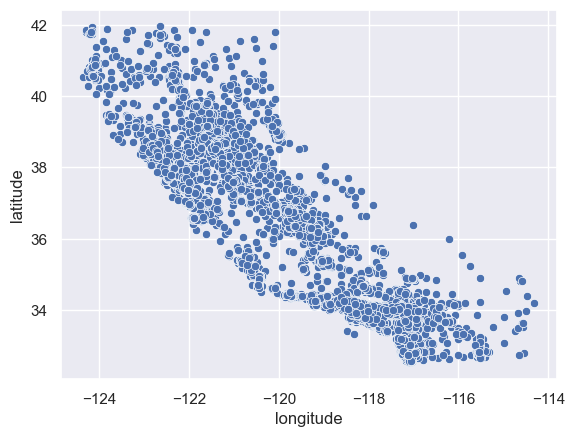

In [93]:
sns.scatterplot(data=df_housing, x="longitude", y = "latitude");

- Trông giống California, nhưng ngoài ra thì khó có thể thấy bất kỳ mẫu cụ thể nào.
- Đặt tùy chọn `alpha` thành 0,4 giúp dễ hình dung hơn nhiều về những nơi có mật độ điểm dữ liệu cao

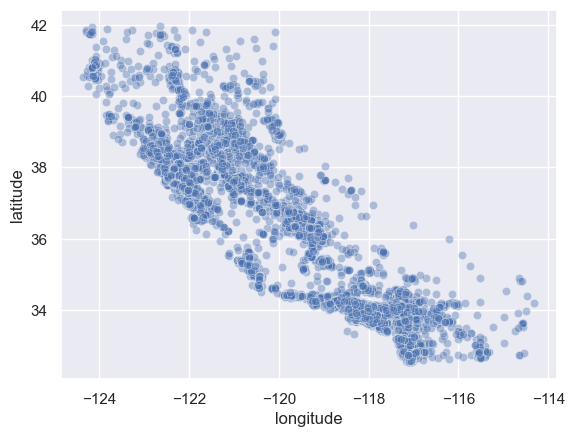

In [104]:
sns.scatterplot(data=df_housing, x="longitude", y = "latitude", alpha = 0.4);

- Rõ ràng, các khu vực có mật độ dân số cao là Vùng Vịnh và xung quanh Los Angeles và San Diego, cộng với một đường dài có mật độ dân số khá cao ở Thung lũng Trung tâm, đặc biệt là xung quanh Sacramento và Fresno.

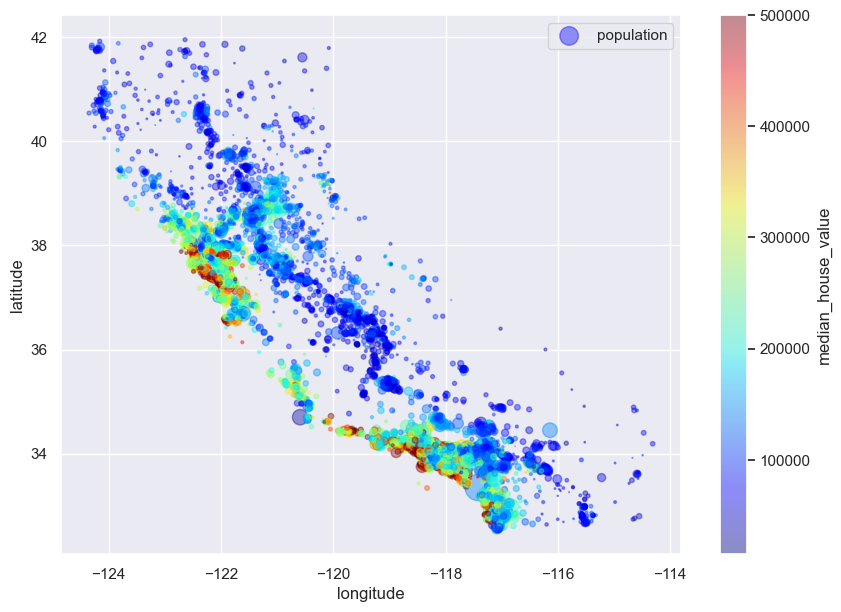

In [ ]:
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #To represent Population
    s=df_housing["population"]/100, label="population", figsize=(10,7),
    #To represent House Price
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
# df_housing["population"]/100 là để giảm scale lại.
plt.legend()
plt.show()

- Giá nhà có liên quan rất nhiều đến
- vị trí (ví dụ: gần đại dương) và mật độ dân số, ...

### 3.2. Looking for Correlations
- Vì tập dữ liệu không quá lớn, bạn có thể dễ dàng tính toán hệ số tương quan chuẩn (còn gọi là r của Pearson) giữa mọi cặp thuộc tính bằng phương pháp `corr()

In [107]:
corr_matrix = df_housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


- Bây giờ hãy xem xét mức độ tương quan của từng thuộc tính với `median_house_value`:

In [108]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Hệ số tương quan Pearson (r) có giá trị giao động trong khoảng liên tục từ -1 đến +1:

* **r = 0:** Hai biến không có tương quan tuyến tính
* **r = 1; r = -1:** Hai biến có mối tương quan tuyến tính tuyệt đối. 
Ví dụ: Với r = 1, giá trị nhà trung bình có xu hướng tăng khi thu nhập trung bình tăng.

* **r < 0:** Hệ số tương quan âm. Nghĩa là giá trị biến x tăng thì giá trị biến y giảm và ngược lại, giá trị biến y tăng thì giá trị biến x giảm.
* **r > 0:** Hệ số tương quan dương. Nghĩa là giá trị biến x tăng thì giá trị biến y tăng và ngược lại, giá trị biến y tăng thì giá trị biến x cũng tăng.

**Lưu ý:** <br>
Hệ số tương quan pearson (r) chỉ có ý nghĩa khi và chỉ khi mức ý nghĩa quan sát (sig.) nhỏ hơn mức ý nghĩa α = 5%.
* Nếu r nằm trong khoảng từ 0,50 đến ± 1, thì nó được cho là tương quan mạnh.
* Nếu r nằm trong khoảng từ 0,30 đến ± 0,49, thì nó được gọi là tương quan trung bình.
* Nếu r nằm dưới ± .29, thì nó được gọi là một mối tương quan yếu.
Trên đồ thị phân tán Scatter, nếu r = -1 dữ liệu sẽ phân bổ trên một đường thẳng với độ dốc âm, r = 1 dữ liệu sẽ phân bổ trên một đường thẳng với độ dốc dương.

![](correlation.png)

In [109]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


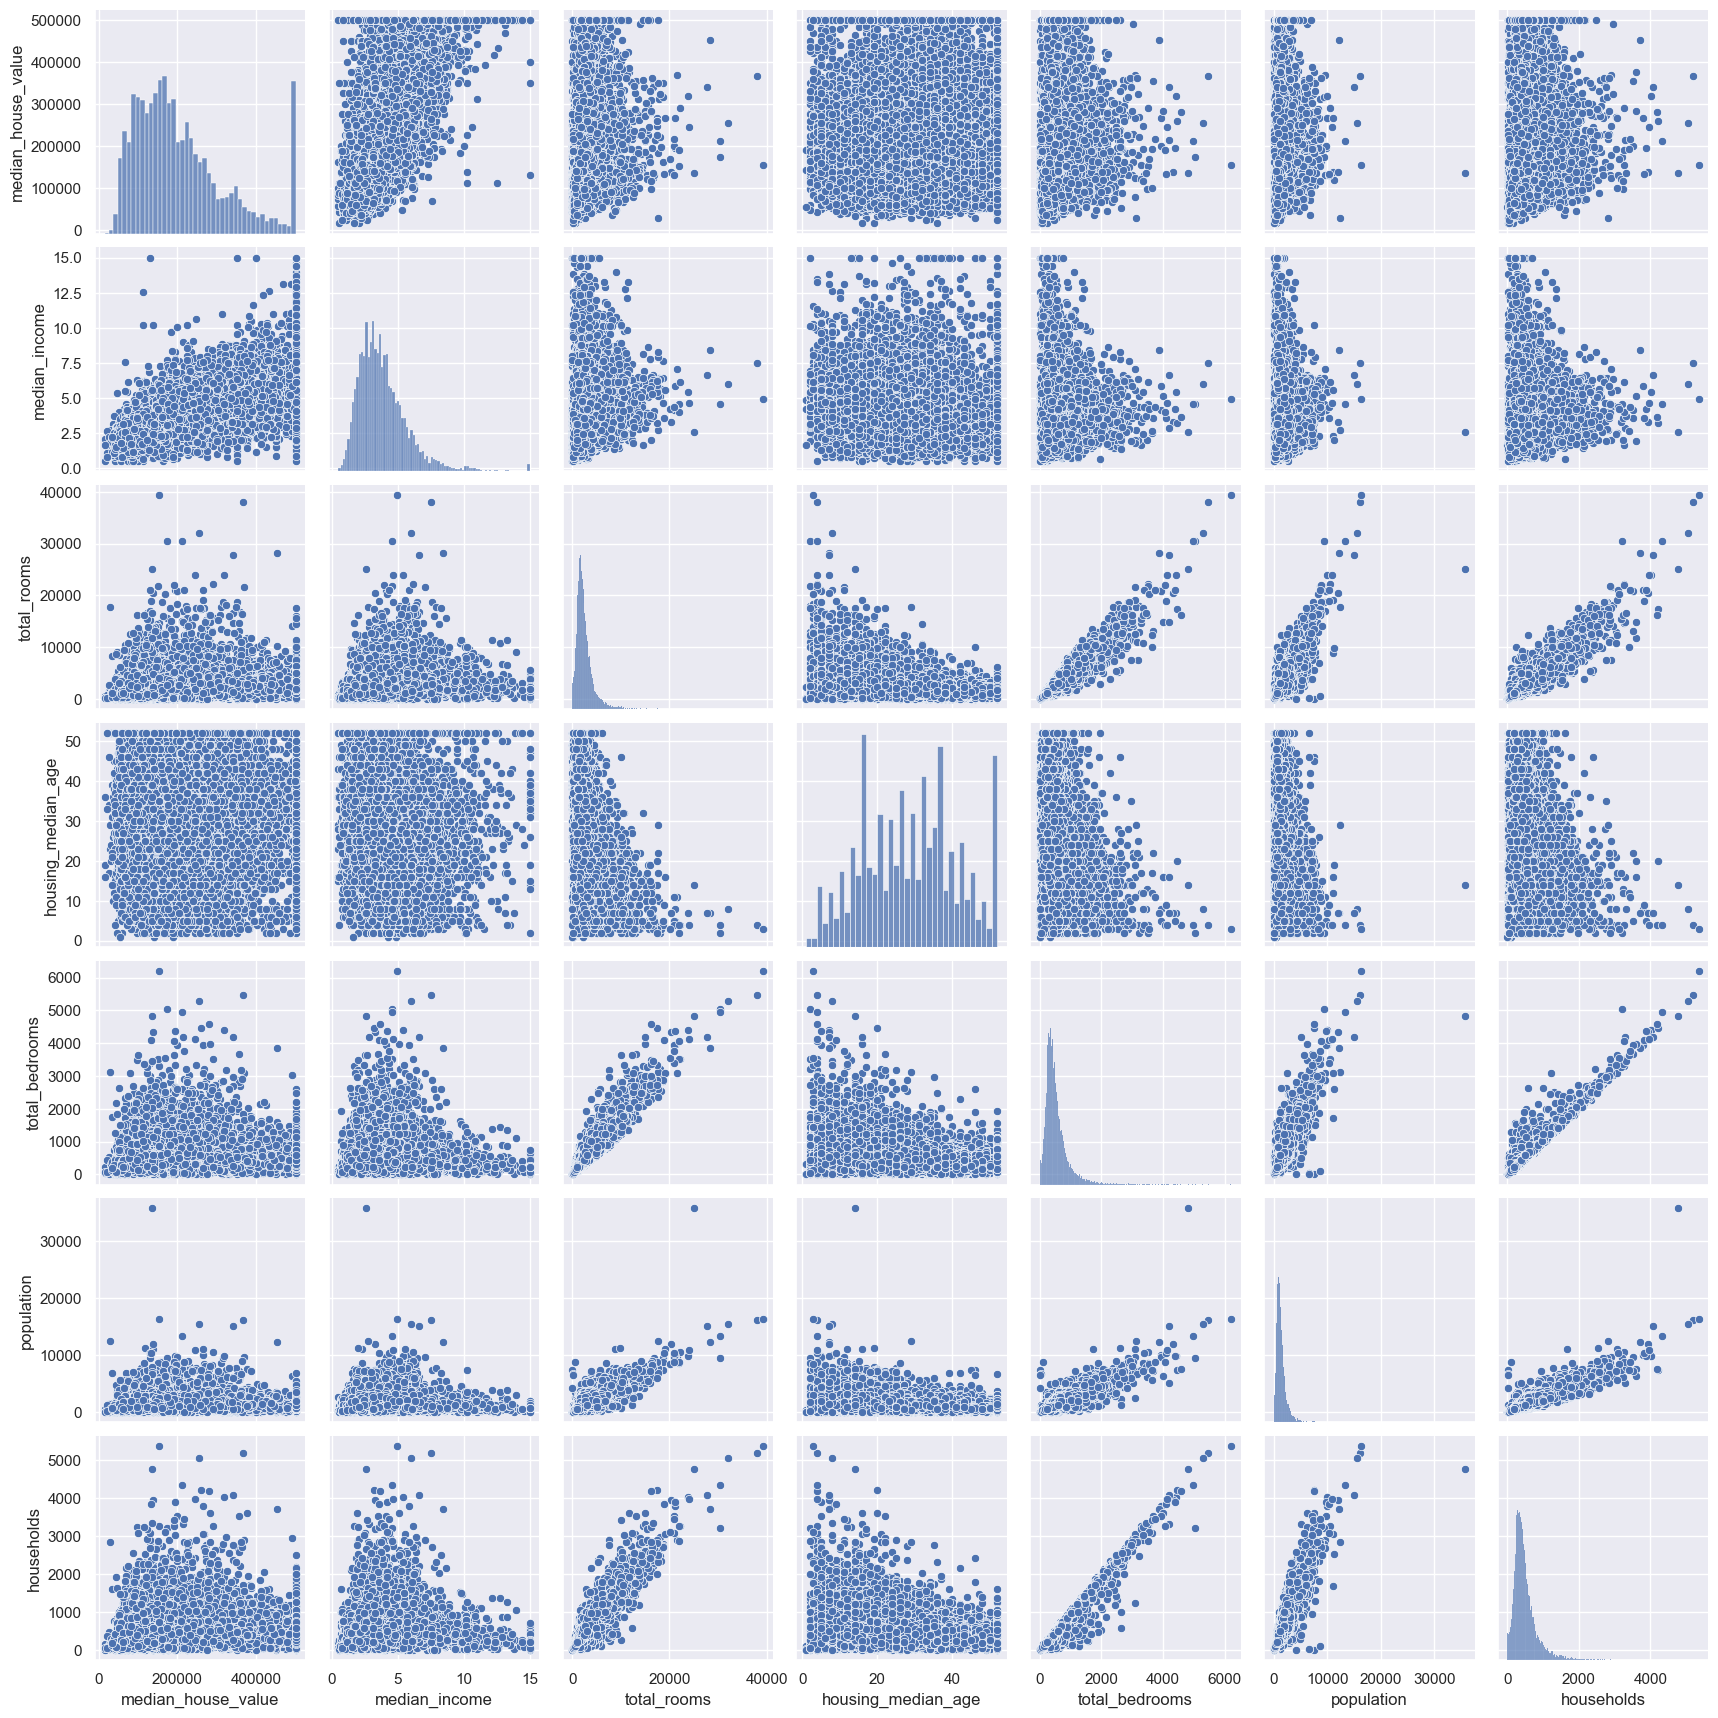

In [112]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age", "total_bedrooms", "population", "households"]

sns.pairplot(df_housing[attributes]);

- Dựa vào figure trên thì có thể thấy `median_income` là feature hứa hẹn dùng để dự đoán `median_house_value`. 
- Tương quan thực sự rất mạnh, có thể thấy rõ xu hướng tăng và các điểm không quá phân tán.

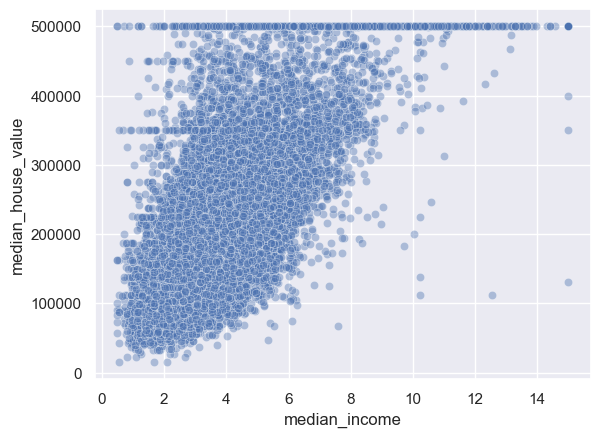

In [116]:
sns.scatterplot(data=df_housing, x = "median_income", y = "median_house_value", alpha=0.4);

- Mức giá bị hạn chế `500000$` như đã đề cập trước đó biểu diễn dưới dạng đường hàng ngang trên cùng.
- Ngoài ra còn có 1 số đường ít rõ ràng hơn chẳng hạn như đường ngang `450000$`,  `280000$`, `350000$`.

### 3.3. Experimenting with Attribute Combinations
- Một điều cuối cùng có thể muốn làm trước khi thực sự chuẩn bị dữ liệu cho các thuật toán Học máy là thử nghiệm nhiều kết hợp thuộc tính khác nhau.
- Ví dụ, tổng số phòng trong một quận không hữu ích lắm nếu bạn không biết có bao nhiêu hộ gia đình.
- Điều bạn thực sự muốn là số phòng trên mỗi hộ gia đình.
- Tương tự như vậy,  dân số trên mỗi hộ gia đình cũng có vẻ là một kết hợp thuộc tính thú vị để xem xét. Hãy tạo các thuộc tính mới này:

In [117]:
df_housing["rooms_per_household"] = df_housing["total_rooms"] / df_housing["households"]
df_housing["bedrooms_per_room"] = df_housing["total_bedrooms"] / df_housing["total_rooms"]
df_housing["population_per_household"]=df_housing["population"] / df_housing["households"]

In [118]:
corr_matrix = df_housing.corr(numeric_only=True)

In [119]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

- Thuộc tính `bedrooms_per_room` mới có mối tương quan nhiều với `median_house_value` so với `population_per_household` hoặc `rooms_per_household` mặc dù là tương quan âm.
- Rõ ràng là những ngôi nhà có tỷ lệ phòng ngủ/phòng thấp hơn có xu hướng đắt hơn.
- Số phòng trên mỗi hộ gia đình (`rooms_per_household`) cũng cung cấp nhiều thông tin hơn so với tổng số phòng trong một quận—rõ ràng là nhà càng lớn thì càng đắt mặc dù là tương quan dương yếu nhưng cũng đủ kết luật là nhà càng to (số phòng càng nhiều) thì giá càng cao.

# 4. Prepare the Data for Machine Learning Algorithms

- Quay lại tập huấn luyện (bằng cách sao chép `strat_train_set` một lần nữa).

In [121]:
df_housing = strat_train_set.drop("median_house_value", axis=1)
df_housing_labels = strat_train_set["median_house_value"].copy()

In [123]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [126]:
for idx, col in enumerate(df_housing.columns):
    print(f"{idx}: {col}")

0: longitude
1: latitude
2: housing_median_age
3: total_rooms
4: total_bedrooms
5: population
6: households
7: median_income
8: ocean_proximity


## 4.1. Dọn dẹp dữ liệu

### 4.1.1. Handling Missing Values

- Hầu hết các thuật toán Học máy không thể hoạt động với các tính năng bị thiếu, vì vậy hãy tạo một vài hàm để xử lý chúng.
- Bạn đã nhận thấy trước đó rằng thuộc tính `total_bedrooms` có một số giá trị bị thiếu, vì vậy hãy sửa lỗi này. Bạn có ba tùy chọn:
    - Xóa các record tương ứng.
    - Xóa toàn bộ thuộc tính.
    - Đặt các giá trị thành một số giá trị (không, giá trị trung bình, giá trị trung vị, v.v.).

- Scikit-Learn cung cấp một lớp tiện dụng để xử lý các giá trị bị thiếu: `SimpleImputer`.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# Vì trung vị chỉ có thể được tính toán trên các thuộc tính số,
# chúng ta cần tạo một bản sao của dữ liệu mà không có thuộc tính văn bản ocean_proximity

df_housing_num = df_housing.drop("ocean_proximity", axis=1)
imputer.fit(df_housing_num)

SimpleImputer(strategy='median')

- `imputer` chỉ tính toán **trung vị của mỗi thuộc tính** và lưu trữ kết quả trong biến thể hiện `statistics_` của nó.
- Chỉ có thuộc tính `total_bedrooms` bị thiếu giá trị, nhưng không thể chắc chắn rằng sẽ không có giá trị nào bị thiếu trong dữ liệu mới sau khi hệ thống hoạt động, vì vậy, an toàn hơn khi áp dụng imputer cho tất cả các thuộc tính số.

In [128]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# Kiểm tra các giá trị median bằng median() xem có giống "statistics_"
df_housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

### 4.1.2. Handling Text and Categorical Attributes

- Trước đó chúng ta đã bỏ qua thuộc tính phân loại `ocean_proximity` vì nó là thuộc tính phân loại nên chúng ta không thể tính toán trung vị của nó.

In [ ]:
# `df_housing[["ocean_proximity"]]` nghĩa là **lấy ra một DataFrame chỉ chứa cột "ocean_proximity"** từ DataFrame gốc `df_housing`.
# - Nếu bạn dùng **một cặp ngoặc vuông**:  
#   `df_housing["ocean_proximity"]`  
#   → Kết quả là một **Series** (một chiều).
# - Nếu bạn dùng **hai cặp ngoặc vuông**:  
#   `df_housing[["ocean_proximity"]]`  
#   → Kết quả là một **DataFrame** (hai chiều), vẫn giữ dạng bảng.
# **Tóm lại:**  
# - Hai cặp ngoặc vuông dùng để lấy ra một DataFrame (dạng bảng), thuận tiện khi bạn muốn xử lý dữ liệu nhiều cột
# hoặc dùng cho các hàm yêu cầu đầu vào là DataFrame.
df_housing_cat = df_housing[["ocean_proximity"]]
df_housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [138]:
df_housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


- Hầu hết các thuật toán Học máy đều thích làm việc với số, vì vậy hãy chuyển đổi các danh mục này từ `categorical` sang `numerical`.
- Đối với điều này, chúng ta có thể sử dụng class `OneHotEncoder` của Scikit-Learn.

In [137]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_housing_cat_1hot = encoder.fit_transform(df_housing_cat)
df_housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

- Output là `SciPy sparse matrix`, thay vì mảng NumPy.
- Điều này là do One-Hot Encoding sẽ trả về sparse matrix, là ma trận mà hầu hết các phần tử đều bằng 0. Xử lý một ma trận sparse như một ma trận dày đặc thường không hiệu quả, sử dụng quá nhiều bộ nhớ.
- Vì vậy, khi làm việc với các ma trận sparse, nên sử dụng các cấu trúc dữ liệu chuyên dụng `SciPy sparse matrix` để chỉ lưu trữ các giá trị khác không và vị trí của chúng là một kỹ thuật phổ biến trong việc lưu trữ các tập dữ liệu sparse. để lưu trữ và xử lý hiệu quả.
- Để chuyển đổi nó thành một mảng NumPy (dày đặc), chỉ cần gọi phương thức `toarray()`:

In [139]:
df_housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [140]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 4.1.3. Custom Transformers
- Mặc dù Scikit-Learn cung cấp nhiều bộ chuyển đổi hữu ích, bạn sẽ cần phải tự viết bộ chuyển đổi cho các tác vụ như hoạt động dọn dẹp tùy chỉnh hoặc kết hợp các thuộc tính cụ thể
- Vì Scikit-Learn dựa vào **duck typing** (không phải kế thừa), tất cả những gì bạn cần là tạo một lớp và triển khai ba phương thức: `fit()` (trả về self nếu không có gì), `transform()` và `fit_transform()` (chỉ cần thêm `TransformerMixin` làm lớp cơ sở).

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin

total_rooms_idx, total_bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # nothing else to do
    def transform(self, X, y = None):
        rooms_per_household = X[:, total_rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] / X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, total_bedrooms_idx] / X[:, total_rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df_housing.values)      

- `np.c_`: là một công cụ của NumPy dùng để nối (stack) các mảng theo chiều cột (column-wise), tức là ghép các mảng lại với nhau thành các cột mới.
Ví dụ:
```python
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
# Dùng np.c_ để ghép a và b thành 2 cột của một ma trận mới
result = np.c_[a, b]
print(result)
```
- bộ chuyển đổi có một siêu tham số, `add_bedrooms_per_room`, được đặt thành True theo mặc định (thường hữu ích khi cung cấp các giá trị mặc định hợp lý).
- Siêu tham số này sẽ cho phép bạn dễ dàng tìm ra liệu việc thêm thuộc tính này có giúp ích cho các thuật toán Học máy hay không.
- Bạn càng tự động hóa các bước chuẩn bị dữ liệu này, bạn càng có thể tự động thử nhiều kết hợp hơn, giúp bạn có nhiều khả năng tìm thấy một kết hợp tuyệt vời (và tiết kiệm rất nhiều thời gian).

## 4.2. Feature Scaling
Hai cách phổ biến để có được tất cả các thuộc tính có cùng một tỷ lệ: <br>
- `Min-max scaling (normalization)`: các giá trị được dịch chuyển và thay đổi tỷ lệ để chúng kết thúc trong phạm vi từ 0 đến 1.
    Syntax:
    X_scaled = (X - X_min) / (X_max - X_min) <br>
    `X`: giá trị gốc <br>
    `X_min`: giá trị nhỏ nhất của thuộc tính <br>
    `X_max`: giá trị lớn nhất của thuộc tính <br>

    **Ý nghĩa:** <br>
    Sau khi min-max scaling, tất cả các giá trị sẽ nằm trong khoảng từ 0 đến 1. <br>
    Giúp các thuật toán học máy hoạt động hiệu quả hơn, đặc biệt là các thuật toán nhạy cảm với thang đo (như KNN, mạng nơ-ron) <br>

    **Ví dụ:**
    ```python
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    ```
    **Lưu ý:** <br>
    Min-max scaling rất nhạy cảm với giá trị ngoại lai (outlier).

- `Standardization (chuẩn hóa z-score)`: Không giống như tỷ lệ min-max scaling, chuẩn hóa **không ràng buộc các giá trị vào một phạm vi cụ thể**, điều này có thể là vấn đề đối với một số thuật toán (ví dụ: mạng nơ-ron thường mong đợi một giá trị đầu vào trong phạm vi từ 0 đến 1). Tuy nhiên, **chuẩn hóa ít bị ảnh hưởng bởi các giá trị ngoại lai hơn nhiều.**

    Là kỹ thuật chuyển đổi dữ liệu sao cho mỗi đặc trưng (feature) có trung bình (mean) = 0 và độ lệch chuẩn (std) = 1.
    Syntax:
    X_scaled = (X - mean) / std <br>
    `mean`: giá trị trung bình của thuộc tính <br>
    `std`: độ lệch chuẩn của thuộc tính <br>

    **Ý nghĩa:** <br>
    Sau khi chuẩn hóa, dữ liệu có phân phối chuẩn với mean = 0, std = 1. <br>
    Ít bị ảnh hưởng bởi outlier hơn so với min-max scaling. <br>
    Thường dùng cho các thuật toán như Linear Regression, SVM, KNN, PCA... <br>

    **Ví dụ:**
    ```python
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    ```
    **Lưu ý:** <br>
    Standardization không giới hạn giá trị trong một khoảng cố định như [0, 1] (dữ liệu sau khi chuẩn hóa sẽ có trung bình = 0 và độ lệch chuẩn = 1, nhưng giá trị của các phần tử có thể nhỏ hơn 0 hoặc lớn hơn 1).

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "median")),
    ("attr_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])

In [162]:
df_housing_num.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

- Cho đến nay, chúng tôi đã xử lý các `categorical columns` và `numerical columns` riêng biệt.
- Sẽ thuận tiện hơn nếu có một bộ chuyển đổi duy nhất có thể xử lý tất cả các cột, áp dụng các phép biến đổi phù hợp cho từng cột.
- Trong phiên bản 0.20, Scikit-Learn đã giới thiệu `ColumnTransformer` cho mục đích này và tin tốt là nó hoạt động rất tốt với Pandas DataFrames. Hãy sử dụng nó để áp dụng tất cả các phép biến đổi cho dữ liệu `housing`

In [183]:
from sklearn.compose import ColumnTransformer

num_feature = df_housing_num.columns.to_list()
cat_feature = ["ocean_proximity"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_feature),
        ("cat", OneHotEncoder(), cat_feature),
    ]
)

df_housing_prepared = preprocessor.fit_transform(df_housing)
df_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 16))

- Lưu ý rằng `OneHotEncoder` trả về ma trận **sparse**, trong khi `num_pipeline` trả về ma trận **dense**.
- Khi có sự kết hợp giữa ma trận **sparse** và **dense** như vậy, `ColumnTransformer` ước tính mật độ của ma trận cuối cùng (tức là tỷ lệ các ô khác không) và trả về ma trận **sparse** nếu mật độ thấp hơn ngưỡng nhất định (theo mặc định, `sparse_threshold=0.3`). <br>
    **Cụ thể:**
    - Khi bạn sử dụng `ColumnTransformer` để kết hợp nhiều pipeline (ví dụ: một pipeline xử lý số trả về ma trận dense, một pipeline xử lý categorical trả về ma trận sparse), Scikit-Learn sẽ tự động quyết định kiểu dữ liệu đầu ra (dense hay sparse) dựa trên mức độ "thưa" **(density)** của ma trận kết quả. <br>
    - `Density` là tỷ lệ số lượng phần tử khác 0 trên tổng số phần tử trong ma trận.
    - Nếu tỷ lệ này thấp hơn giá trị `sparse_threshold` (mặc định là 0.3, tức 30%), ColumnTransformer sẽ trả về một `sparse matrix` (ma trận thưa, tiết kiệm bộ nhớ).
    - Nếu tỷ lệ này cao hơn hoặc bằng `sparse_threshold`, nó sẽ trả về một `dense matrix` (ma trận dày đặc, kiểu numpy array). <br>

    **Ý nghĩa:** <br>
    - Nếu dữ liệu của bạn chủ yếu là số 0 (ví dụ, sau one-hot encoding nhiều cột), việc dùng `sparse matrix` sẽ tiết kiệm bộ nhớ và tăng tốc xử lý.
    - Nếu dữ liệu chủ yếu là số khác 0, dùng `dense matrix` sẽ thuận tiện hơn. Có thể điều chỉnh ngưỡng `sparse_threshold`
    ```python
    ColumnTransformer(
    ...,
    sparse_threshold=0.5  # ví dụ, tăng ngưỡng lên 50%
    )
    ```
- Trong ví dụ này, nó trả về ma trận **dense**.

# 5. Select and Train a Model
## 5.1. Training and Evaluating on the Training Set

In [184]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_housing_prepared, df_housing_labels)

LinearRegression()

In [188]:
some_data = df_housing.iloc[:5]
some_labels = df_housing_labels.iloc[:5]
some_data_prepared = preprocessor.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", some_labels.to_list())

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(df_housing_prepared) # dùng trực tiếp df_housing_prepared để dữ đoán luôn.
lin_mse = mean_squared_error(df_housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

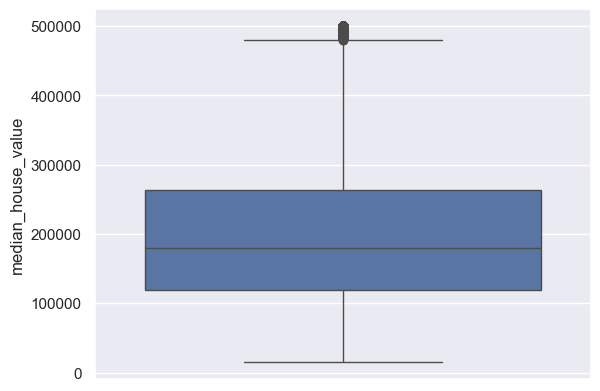

In [193]:
sns.boxplot(data=df_housing_labels);

- Đây không phải là điểm đánh giá tốt: `median_housing_values` của hầu hết các quận nằm trong khoảng từ `$120.000` đến `$265.000`, do đó, giá trị RMSE trả về `$68.628` cho thấy mức sai số trung bình khá lớn so với giá trị thưc tế. <br>
    Ví dụ: Nếu một căn nhà thực tế giá $200.000, mô hình có thể dự đoán lệch lên tới $68.628 (tức là sai số khoảng 30% giá trị thực). <br>
    $200.000 + $68.628 = $268.628 <br>
    $200.000 - $68.628 = $131.372
- Đây là ví dụ về mô hình **underfitting** với dữ liệu đào tạo.
- Khi điều này xảy ra, điều đó có nghĩa là các tính năng không cung cấp đủ thông tin để đưa ra dự đoán tốt hoặc mô hình không đủ mạnh.

- **Giải pháp**: các cách chính để khắc phục **underfitting**:
    - Chọn một mô hình mạnh hơn,
    - Cung cấp các tính năng tốt hơn cho thuật toán đào tạo hoặc
    - Giảm các ràng buộc đối với mô hình.

- Hãy đào tạo một `DecisionTreeRegressor` (Chương 6). Đây là một mô hình mạnh mẽ, có khả năng tìm ra các mối quan hệ **nonlinear** phức tạp trong dữ liệu

In [194]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_housing_prepared, df_housing_labels)

DecisionTreeRegressor()

In [196]:
housing_predictions_tree = tree_reg.predict(df_housing_prepared) # dùng trực tiếp df_housing_prepared để dữ đoán luôn.
tree_mse = mean_squared_error(df_housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

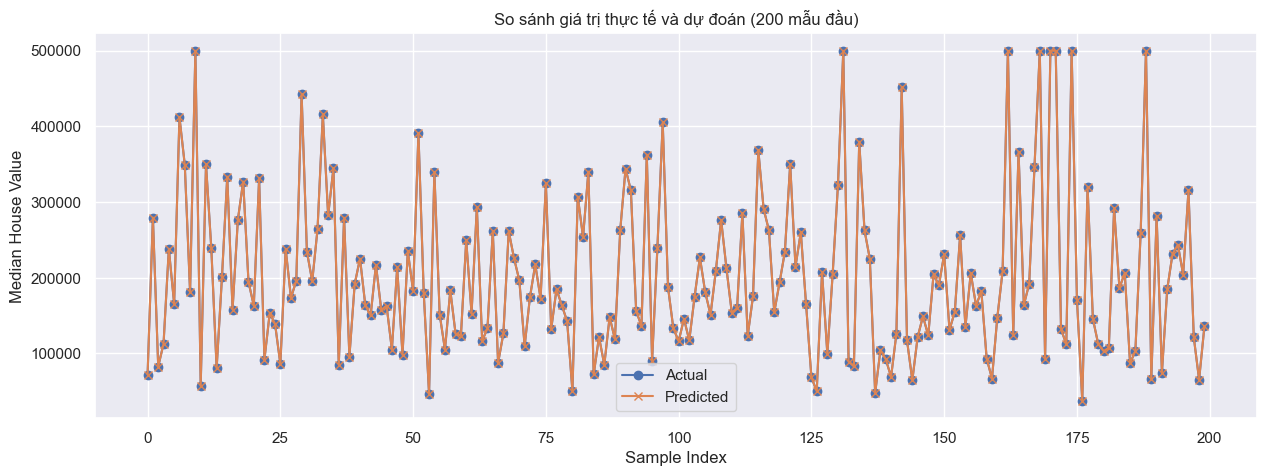

In [202]:
# Kiểm tra **overfit** giữa df_housing_labels và housing_predictions_tree
plt.figure(figsize=(15,5))
plt.plot(df_housing_labels.values[:200], label='Actual', marker='o')
plt.plot(housing_predictions_tree[:200], label='Predicted', marker='x')
plt.title('So sánh giá trị thực tế và dự đoán (200 mẫu đầu)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

- Không có lỗi nào cả? Có nhiều khả năng là mô hình đã **overfit** dữ liệu.
- Làm sao bạn có thể chắc chắn? Như chúng ta đã thấy trước đó, bạn không muốn chạm vào bộ kiểm tra cho đến khi bạn sẵn sàng khởi chạy một mô hình mà bạn tự tin, vì vậy bạn cần sử dụng một phần của bộ đào tạo để đào tạo và một phần để xác thực mô hình.

## 5.2. Evaluation Using Cross-Validation